This study is about the change of the NFL running back position over time.  Starting from the first NFL Super Bowl in 1966, I will mainly explore the change of team total running yards per year.  I will also explore any anomilies in the data and try to highlight discrepencies in hopes to identify a changepoint.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
sns.set(style="darkgrid")
from collections import Counter
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
for i in range(1966, 2021):
    exec(f'rushing_data_{i} = pd.read_csv(f"rushing_data/{i}.csv")')
    exec(f'rushing_data_{i}["year"] = {i}')

rushing_data_1966.head()

frames = [rushing_data_1966, rushing_data_1967, rushing_data_1968, rushing_data_1969, 
          rushing_data_1970, rushing_data_1971, rushing_data_1972, rushing_data_1973, rushing_data_1974, rushing_data_1975, rushing_data_1976, rushing_data_1977, rushing_data_1978, rushing_data_1979,
          rushing_data_1980, rushing_data_1981, rushing_data_1982, rushing_data_1983, rushing_data_1984, rushing_data_1985, rushing_data_1986, rushing_data_1987, rushing_data_1988, rushing_data_1989,
          rushing_data_1990, rushing_data_1991, rushing_data_1992, rushing_data_1993, rushing_data_1994, rushing_data_1995, rushing_data_1996, rushing_data_1997, rushing_data_1998, rushing_data_1999,
          rushing_data_2000, rushing_data_2001, rushing_data_2002, rushing_data_2003, rushing_data_2004, rushing_data_2005, rushing_data_2006, rushing_data_2007, rushing_data_2008, rushing_data_2009,
          rushing_data_2010, rushing_data_2011, rushing_data_2012, rushing_data_2013, rushing_data_2014, rushing_data_2015, rushing_data_2016, rushing_data_2017, rushing_data_2018, rushing_data_2019,
          rushing_data_2020]

rushing_data = pd.concat(frames)

rushing_data = rushing_data.rename(columns={'Rk':'Rank', 'Tm':'Team', 'G':'Games', 'Att':'Attempts', 'Yds':'Yards',
                            'TD':'Touchdowns', 'Lng':'Longest Attempt', 'Y/A':'Avg Yards per Attempt',
                            'Y/G':'Avg Yards per Game', 'Fmb':'Fumbles', 'year':'Year', 'EXP':'Expected Points to Contribute'})

print(rushing_data.tail())

    Rank                  Team  Games  Attempts  Yards  Touchdowns  \
27  28.0  Jacksonville Jaguars     16       337   1519           9   
28  29.0  Tampa Bay Buccaneers     16       369   1519          16   
29  30.0         Detroit Lions     16       367   1499          17   
30  31.0        Houston Texans     16       344   1466          10   
31  32.0   Pittsburgh Steelers     16       373   1351          12   

    Longest Attempt  Avg Yards per Attempt  Avg Yards per Game  Fumbles  Year  \
27               47                    4.5                94.9       16  2020   
28               98                    4.1                94.9       12  2020   
29               54                    4.1                93.7       13  2020   
30               48                    4.3                91.6       21  2020   
31               59                    3.6                84.4       22  2020   

    Expected Points to Contribute  This is file 2011Rk  
27                           9.41  

In [4]:
for i in range(1966, 2021):
    exec(f'passing_data_{i} = pd.read_csv(f"passing_data/{i}.csv")')
    exec(f'passing_data_{i}["year"] = {i}')
    
frames = [passing_data_1966, passing_data_1967, passing_data_1968, passing_data_1969, 
          passing_data_1970, passing_data_1971, passing_data_1972, passing_data_1973, passing_data_1974, passing_data_1975, passing_data_1976, passing_data_1977, passing_data_1978, passing_data_1979,
          passing_data_1980, passing_data_1981, passing_data_1982, passing_data_1983, passing_data_1984, passing_data_1985, passing_data_1986, passing_data_1987, passing_data_1988, passing_data_1989,
          passing_data_1990, passing_data_1991, passing_data_1992, passing_data_1993, passing_data_1994, passing_data_1995, passing_data_1996, passing_data_1997, passing_data_1998, passing_data_1999,
          passing_data_2000, passing_data_2001, passing_data_2002, passing_data_2003, passing_data_2004, passing_data_2005, passing_data_2006, passing_data_2007, passing_data_2008, passing_data_2009,
          passing_data_2010, passing_data_2011, passing_data_2012, passing_data_2013, passing_data_2014, passing_data_2015, passing_data_2016, passing_data_2017, passing_data_2018, passing_data_2019,
          passing_data_2020]

passing_data_1966.head()

passing_data = pd.concat(frames)
passing_data.drop(columns=['TD%', 'EXP', 'Cmp%', 'Int%', 'Lng', 'Y/A', 'AY/A', 'Y/C', 'Sk%', 'NY/A', 'ANY/A', '4QC', 'GWD', 'Yds.1'], axis=1, inplace=True)
passing_data = passing_data.rename(columns={'Rk':'Rank', 'Tm':'Team', 'G':'Games', 'Cmp':'Completions', 'Att':'Attempts', 'Yds':'Yards',
                            'TD':'Touchdowns', 'Int':'Interceptions', 'Y/G':'Yards per Game', 'Sk':'Sacks', 'year':'Year',})

print(passing_data.columns)
print(rushing_data.columns)

Index(['Rank', 'Team', 'Games', 'Completions', 'Attempts', 'Yards',
       'Touchdowns', 'Interceptions', 'Yards per Game', 'Rate', 'Sacks',
       'Year'],
      dtype='object')
Index(['Rank', 'Team', 'Games', 'Attempts', 'Yards', 'Touchdowns',
       'Longest Attempt', 'Avg Yards per Attempt', 'Avg Yards per Game',
       'Fumbles', 'Year', 'Expected Points to Contribute',
       'This is file 2011Rk'],
      dtype='object')


In [5]:
print(rushing_data[rushing_data.Yards == rushing_data.Yards.max()])
print(passing_data[passing_data.Yards == passing_data.Yards.max()])

   Rank              Team  Games  Attempts  Yards  Touchdowns  \
0   1.0  Baltimore Ravens     16       596   3296          21   

   Longest Attempt  Avg Yards per Attempt  Avg Yards per Game  Fumbles  Year  \
0               63                    5.5               206.0       18  2019   

   Expected Points to Contribute  This is file 2011Rk  
0                         100.56                  NaN  
   Rank            Team  Games  Completions  Attempts  Yards  Touchdowns  \
0     1  Denver Broncos     16          461       675   5444          55   

   Interceptions  Yards per Game   Rate  Sacks  Year  
0             10           340.3  114.4     20  2013  


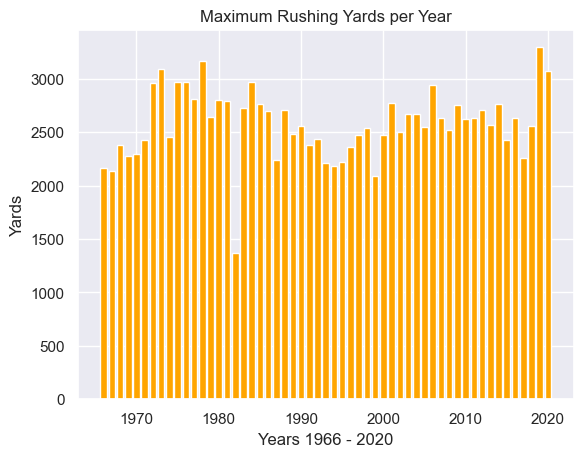

In [6]:
max_rushing_yards = rushing_data.groupby('Year')['Yards'].max()
plt.bar(max_rushing_yards.keys(), max_rushing_yards, color = 'orange')
plt.title('Maximum Rushing Yards per Year')
plt.xlabel('Years 1966 - 2020')
plt.ylabel('Yards')
plt.show()

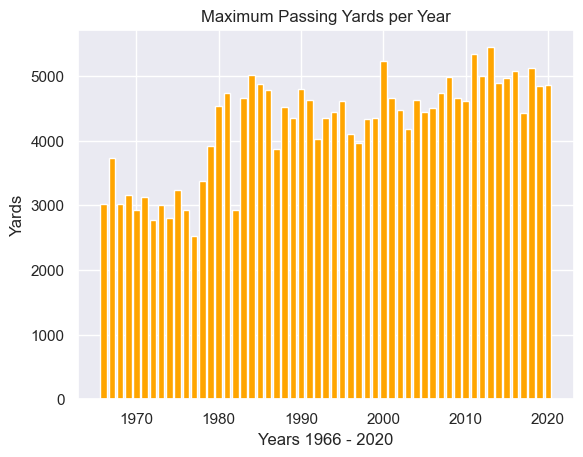

In [7]:
max_passing_yards = passing_data.groupby('Year')['Yards'].max()
plt.bar(max_passing_yards.keys(), max_passing_yards, color = 'orange')
plt.title('Maximum Passing Yards per Year')
plt.xlabel('Years 1966 - 2020')
plt.ylabel('Yards')
plt.show()

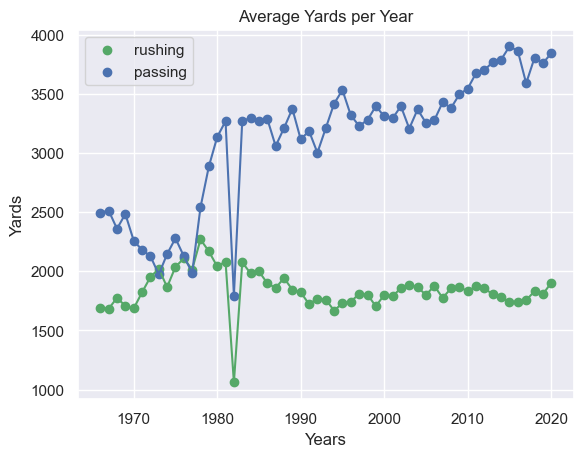

In [10]:
fig = plt.figure()
yards_scatter_ax = fig.add_subplot(111)

years = Counter(rushing_data['Year'])
yearly_avg_rushing_yards = rushing_data.groupby('Year')[['Yards']].mean().sort_values('Year')
yearly_avg_passing_yards = passing_data.groupby('Year')[['Yards']].mean().sort_values('Year')

yards_scatter_ax.scatter(years.keys(), yearly_avg_rushing_yards, color='g', marker='o', label='rushing')
yards_scatter_ax.scatter(years.keys(), yearly_avg_passing_yards, color='b', marker='o', label='passing')

plt.legend(loc='upper left')
plt.plot(years.keys(), yearly_avg_rushing_yards, color='g', linestyle='solid')
plt.plot(years.keys(), yearly_avg_passing_yards, color='b', linestyle='solid')
plt.title('Average Yards per Year')
plt.xlabel('Years')
plt.ylabel('Yards')
plt.show()

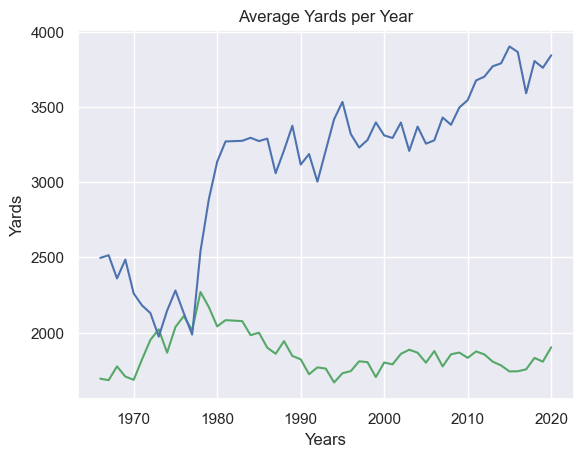

In [13]:
test = yearly_avg_passing_yards['Yards'].values
test[16] = (test[15] + test[17]) / 2

test = yearly_avg_rushing_yards['Yards'].values
test[16] = (test[15] + test[17]) / 2

yards_scatter_ax.scatter(years.keys(), yearly_avg_rushing_yards, color='g', marker='o', label='rushing')
yards_scatter_ax.scatter(years.keys(), yearly_avg_passing_yards, color='b', marker='o', label='passing')

plt.plot(years.keys(), yearly_avg_rushing_yards, color='g', linestyle='solid')
plt.plot(years.keys(), yearly_avg_passing_yards, color='b', linestyle='solid')
plt.title('Average Yards per Year')
plt.xlabel('Years')
plt.ylabel('Yards')
plt.show()

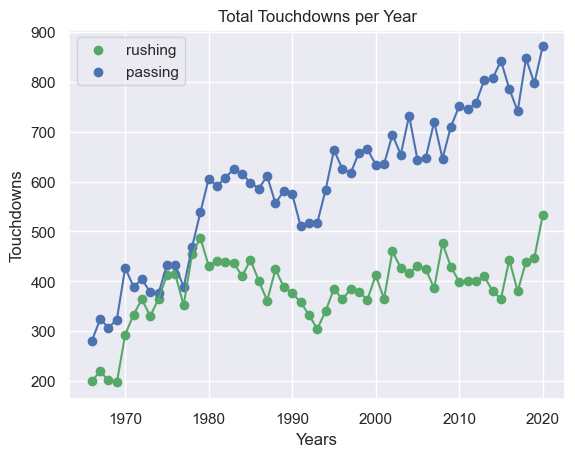

In [14]:
fig = plt.figure()
td_scatter_ax = fig.add_subplot(111)

years = Counter(rushing_data['Year'])
yearly_avg_rushing_td = rushing_data.groupby('Year')[['Touchdowns']].sum().sort_values('Year')
yearly_avg_passing_td = passing_data.groupby('Year')[['Touchdowns']].sum().sort_values('Year')

test = yearly_avg_passing_td['Touchdowns'].values
test[16] = (test[15] + test[17]) / 2

test = yearly_avg_rushing_td['Touchdowns'].values
test[16] = (test[15] + test[17]) / 2

td_scatter_ax.scatter(years.keys(), yearly_avg_rushing_td, color='g', marker='o', label='rushing')
td_scatter_ax.scatter(years.keys(), yearly_avg_passing_td, color='b', marker='o', label='passing')

plt.legend(loc='upper left')
plt.plot(years.keys(), yearly_avg_rushing_td, color='g', linestyle='solid')
plt.plot(years.keys(), yearly_avg_passing_td, color='b', linestyle='solid')
plt.title('Total Touchdowns per Year')
plt.xlabel('Years')
plt.ylabel('Touchdowns')
plt.show()

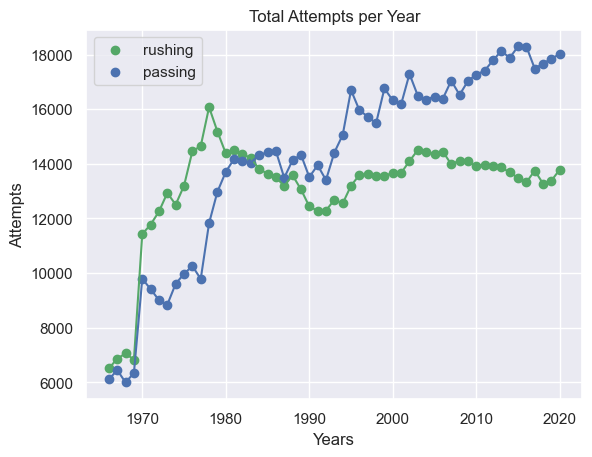

In [15]:
fig = plt.figure()
attempts_scatter_ax = fig.add_subplot(111)

years = Counter(rushing_data['Year'])
yearly_tot_rushing_attempts = rushing_data.groupby('Year')[['Attempts']].sum().sort_values('Year')
yearly_tot_passing_attempts = passing_data.groupby('Year')[['Attempts']].sum().sort_values('Year')

test = yearly_tot_passing_attempts['Attempts'].values
test[16] = (test[15] + test[17]) / 2

test = yearly_tot_rushing_attempts['Attempts'].values
test[16] = (test[15] + test[17]) / 2

attempts_scatter_ax.scatter(years.keys(), yearly_tot_rushing_attempts, color='g', marker='o', label='rushing')
attempts_scatter_ax.scatter(years.keys(), yearly_tot_passing_attempts, color='b', marker='o', label='passing')

plt.legend(loc='upper left')
plt.plot(years.keys(), yearly_tot_rushing_attempts, color='g', linestyle='solid')
plt.plot(years.keys(), yearly_tot_passing_attempts, color='b', linestyle='solid')
plt.title('Total Attempts per Year')
plt.xlabel('Years')
plt.ylabel('Attempts')
plt.show()

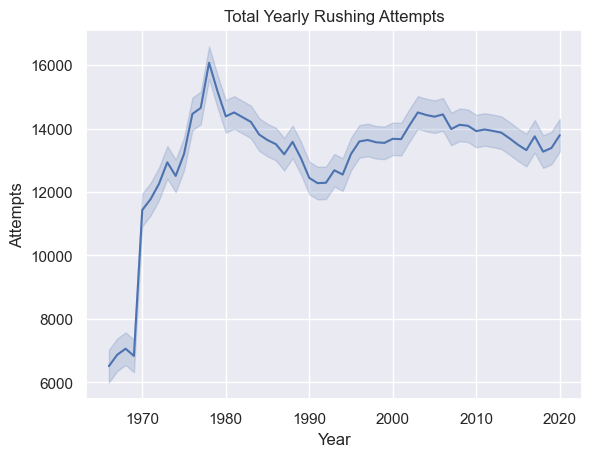

In [17]:
x1 = years.keys()
y1 = np.array(yearly_tot_rushing_attempts)
y1 = y1.flatten()

ci_1 = 1.96 * np.std(y1)/np.sqrt(len(x1))

fig, ax = plt.subplots()
ax.plot(x1, y1)
ax.fill_between(x1, (y1-ci_1), (y1+ci_1), color='b', alpha=.2)
plt.title('Total Yearly Rushing Attempts')
plt.xlabel('Year')
plt.ylabel('Attempts')
plt.show()

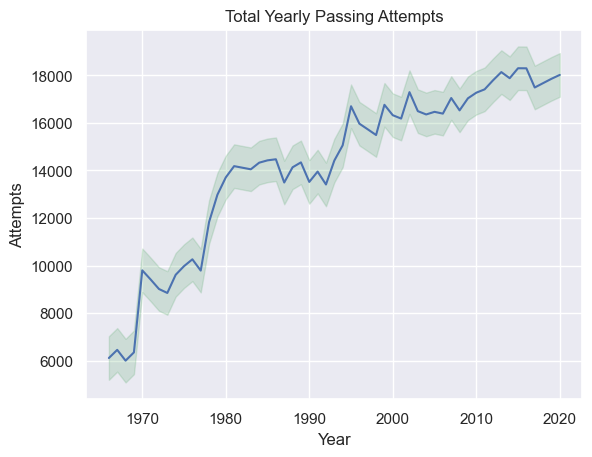

In [20]:
x2 = years.keys()
y2 = np.array(yearly_tot_passing_attempts)
y2 = y2.flatten()

ci_2 = 1.96 * np.std(y2)/np.sqrt(len(x2))

fig, ax = plt.subplots()
ax.plot(x2, y2)
ax.fill_between(x2, (y2-ci_2), (y2+ci_2), color='g', alpha=.2)
plt.title('Total Yearly Passing Attempts')
plt.xlabel('Year')
plt.ylabel('Attempts')
plt.show()

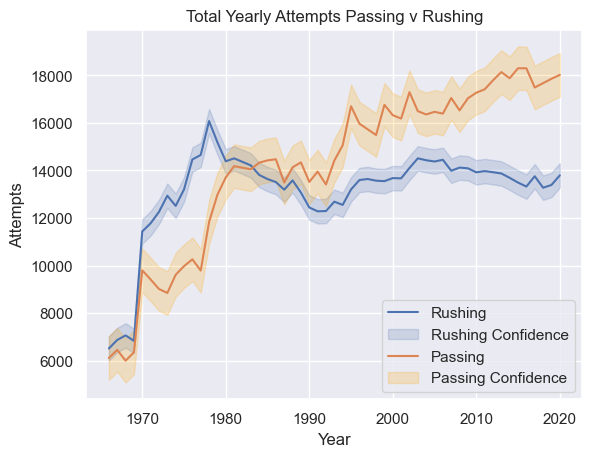

In [21]:
fig, ax = plt.subplots()

ax.plot(x1, y1)
ax.fill_between(x1, (y1-ci_1), (y1+ci_1), color='b', alpha=.2)
ax.plot(x2, y2)
ax.fill_between(x2, (y2-ci_2), (y2+ci_2), color='orange', alpha=.2)

plt.title('Total Yearly Attempts Passing v Rushing')
plt.xlabel('Year')
plt.ylabel('Attempts')
plt.legend(['Rushing', 'Rushing Confidence', 'Passing', 'Passing Confidence'])
plt.show()

In [3]:
player_data_1978 = pd.read_csv('player_data/players1978.csv')
player_data_2020 = pd.read_csv('player_data/players2020.csv')

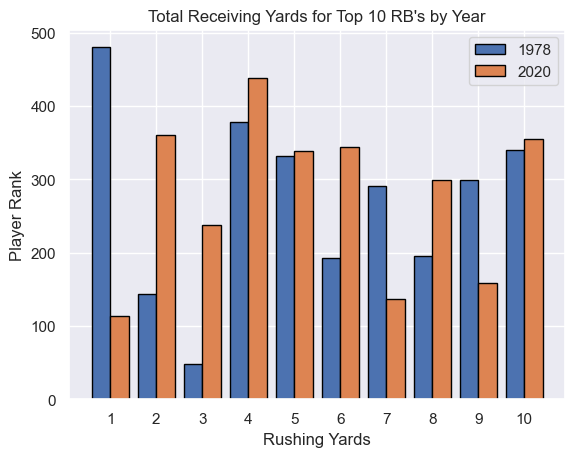

In [7]:
x = player_data_1978.Rk
y1 = player_data_1978.Yds
y2 = player_data_2020.Yds

X_axis = np.arange(len(x)) 
  
plt.bar(X_axis - 0.2, y1, 0.4, label = '1978', edgecolor='black') 
plt.bar(X_axis + 0.2, y2, 0.4, label = '2020', edgecolor='black') 
  
plt.xticks(X_axis, x) 
plt.xlabel("Rushing Yards") 
plt.ylabel("Player Rank") 
plt.title("Total Receiving Yards for Top 10 RB's by Year") 
plt.legend() 
plt.show() 

In [8]:
rushing_1978 = player_data_1978.RushYds.array
total_1978 = player_data_1978.YScm.array
rushing_2020 = player_data_2020.RushYds.array
total_2020 = player_data_2020.YScm.array

percentage_rushing_1978 = []
percentage_rushing_2020 = []

for i in range(10):
    percent = (rushing_1978[i] / total_1978[i]) * 100
    percentage_rushing_1978.append(percent)
    percent = (rushing_2020[i] / total_2020[i]) * 100
    percentage_rushing_2020.append(percent)

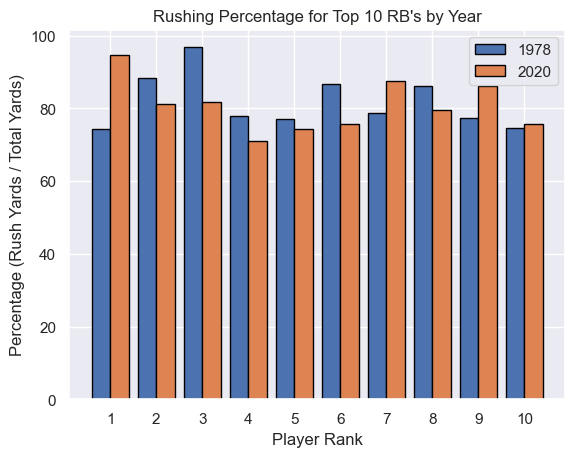

In [9]:
x = player_data_1978.Rk
y1 = percentage_rushing_1978
y2 = percentage_rushing_2020

X_axis = np.arange(len(x)) 
  
plt.bar(X_axis - 0.2, y1, 0.4, label = '1978', edgecolor='black') 
plt.bar(X_axis + 0.2, y2, 0.4, label = '2020', edgecolor='black') 
  
plt.xticks(X_axis, x) 
plt.xlabel("Player Rank") 
plt.ylabel("Percentage (Rush Yards / Total Yards)") 
plt.title("Rushing Percentage for Top 10 RB's by Year") 
plt.legend() 
plt.show() 

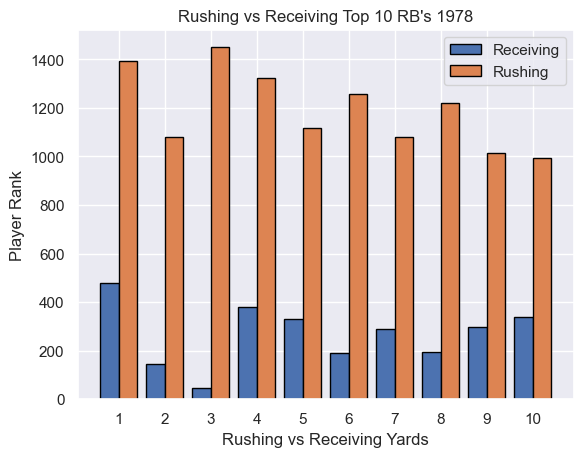

In [15]:
x = player_data_1978.Rk
y1 = player_data_1978.Yds
y2 = player_data_1978.RushYds

X_axis = np.arange(len(x)) 
  
plt.bar(X_axis - 0.2, y1, 0.4, label = 'Receiving', edgecolor='black') 
plt.bar(X_axis + 0.2, y2, 0.4, label = 'Rushing', edgecolor='black') 
  
plt.xticks(X_axis, x) 
plt.xlabel("Rushing vs Receiving Yards") 
plt.ylabel("Player Rank") 
plt.title("Rushing vs Receiving Top 10 RB's 1978") 
plt.legend() 
plt.show() 

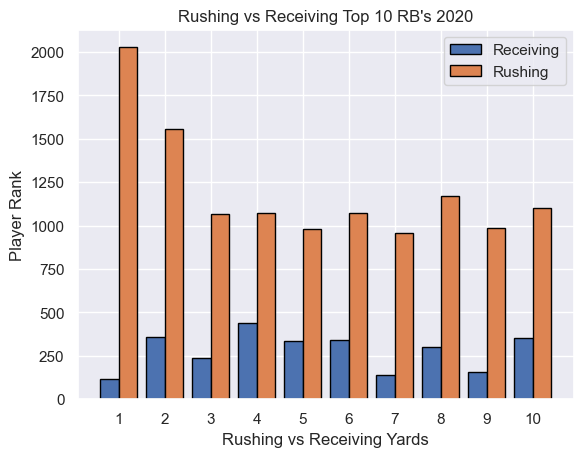

In [17]:
x = player_data_1978.Rk
y1 = player_data_2020.Yds
y2 = player_data_2020.RushYds

X_axis = np.arange(len(x)) 
  
plt.bar(X_axis - 0.2, y1, 0.4, label = 'Receiving', edgecolor='black') 
plt.bar(X_axis + 0.2, y2, 0.4, label = 'Rushing', edgecolor='black') 
  
plt.xticks(X_axis, x) 
plt.xlabel("Rushing vs Receiving Yards") 
plt.ylabel("Player Rank") 
plt.title("Rushing vs Receiving Top 10 RB's 2020") 
plt.legend() 
plt.show() 